<a href="https://colab.research.google.com/github/firarru/Matkul-ML/blob/main/ML_Social_Media_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
path = kagglehub.dataset_download("mahdimashayekhi/social-media-vs-productivity")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-media-vs-productivity


In [3]:
import os

files = os.listdir(path)
print("Files in dataset:", files)

dataset_path = os.path.join(path, "social_media_vs_productivity.csv")
df = pd.read_csv(dataset_path)

df

Files in dataset: ['social_media_vs_productivity.csv']


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,27235.0,3.113418,2.074813,0.000000,1.639566,3.025913,4.368917,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,28386.0,5.510488,2.023470,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,5.514059,2.866344,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,27402.0,6.500247,1.464004,3.000000,5.493536,6.498340,7.504143,10.000000
screen_time_before_sleep,27789.0,1.025568,0.653355,0.000000,0.528490,1.006159,1.477221,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


# **Data Preparation**

In [6]:
df.drop_duplicates(inplace=True)

Handling Missing Value

In [7]:
df.isnull().sum()/len(df)*100

,0
age,0.000000
gender,0.000000
job_type,0.000000
daily_social_media_time,9.216667
social_platform_preference,0.000000
number_of_notifications,0.000000
work_hours_per_day,0.000000
perceived_productivity_score,5.380000
actual_productivity_score,7.883333
stress_level,6.346667


In [8]:
df.shape

(30000, 19)

In [9]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns

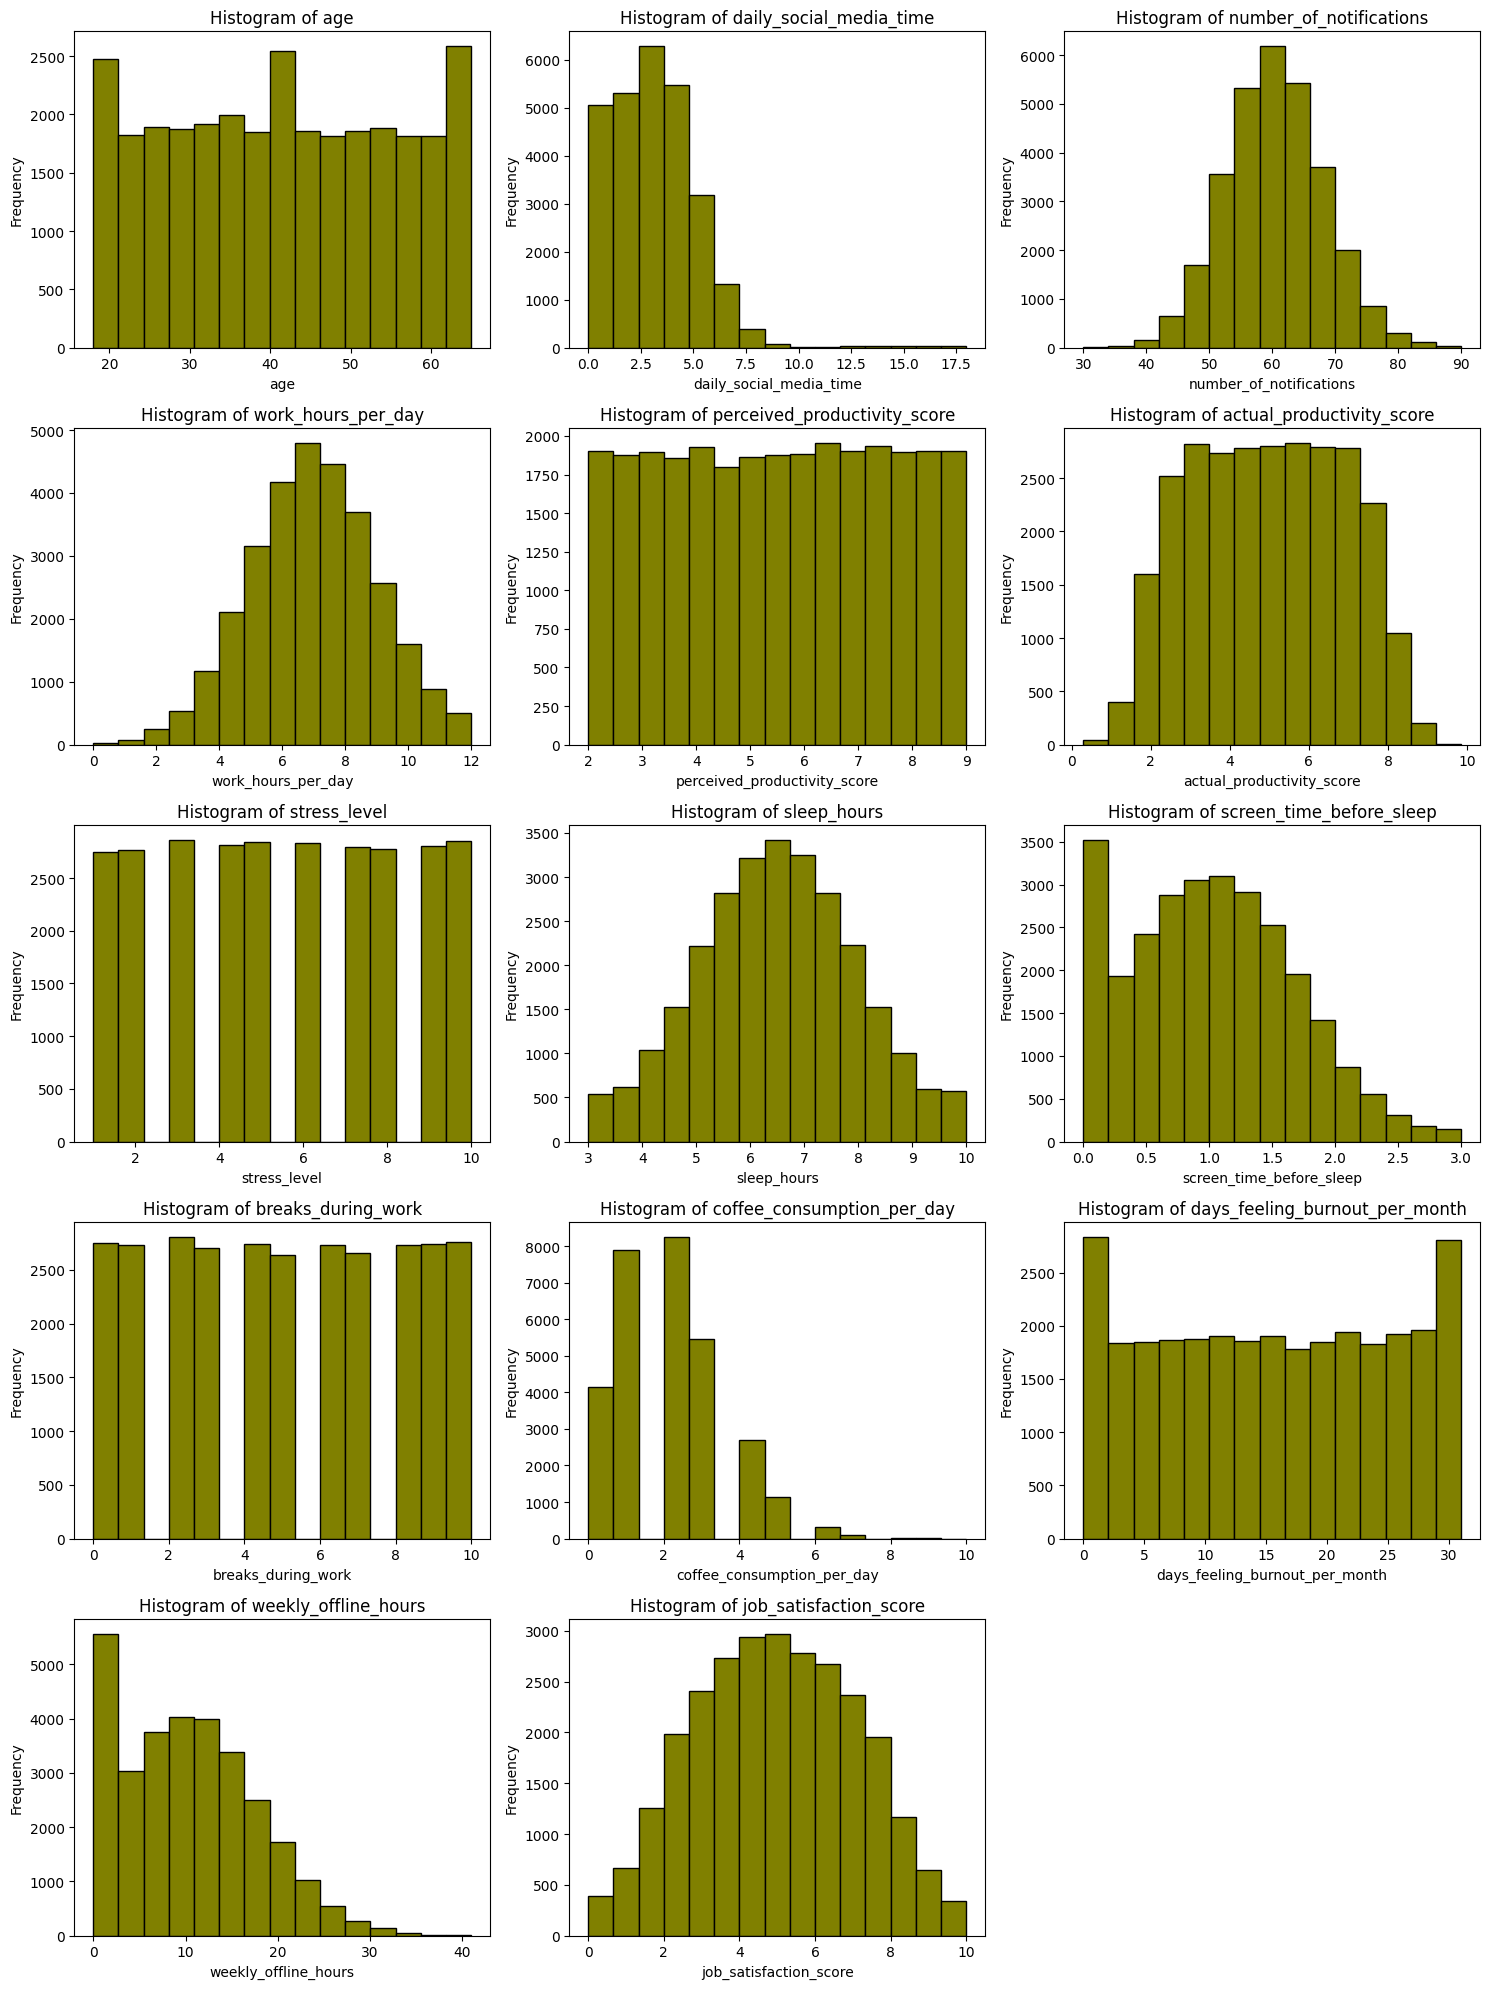

In [10]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='hist', color='olive', bins=15, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Handling missing value dilakukan dengan mengisinya dengan mean atau median, tergantung dari distribusi data awal. Jika data berdistribusi normal maka missing value diisi dengan mean, jika tidak maka diisi dengan median

In [11]:
df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
df['perceived_productivity_score'].fillna(df['perceived_productivity_score'].mean(), inplace=True)
df['actual_productivity_score'].fillna(df['actual_productivity_score'].mean(), inplace=True)
df['stress_level'].fillna(df['stress_level'].mean(), inplace=True)
df['sleep_hours'].fillna(df['sleep_hours'].mean(), inplace=True)
df['screen_time_before_sleep'].fillna(df['screen_time_before_sleep'].median(), inplace=True)
df['job_satisfaction_score'].fillna(df['job_satisfaction_score'].mean(), inplace=True)

# **EDA**

Univariat

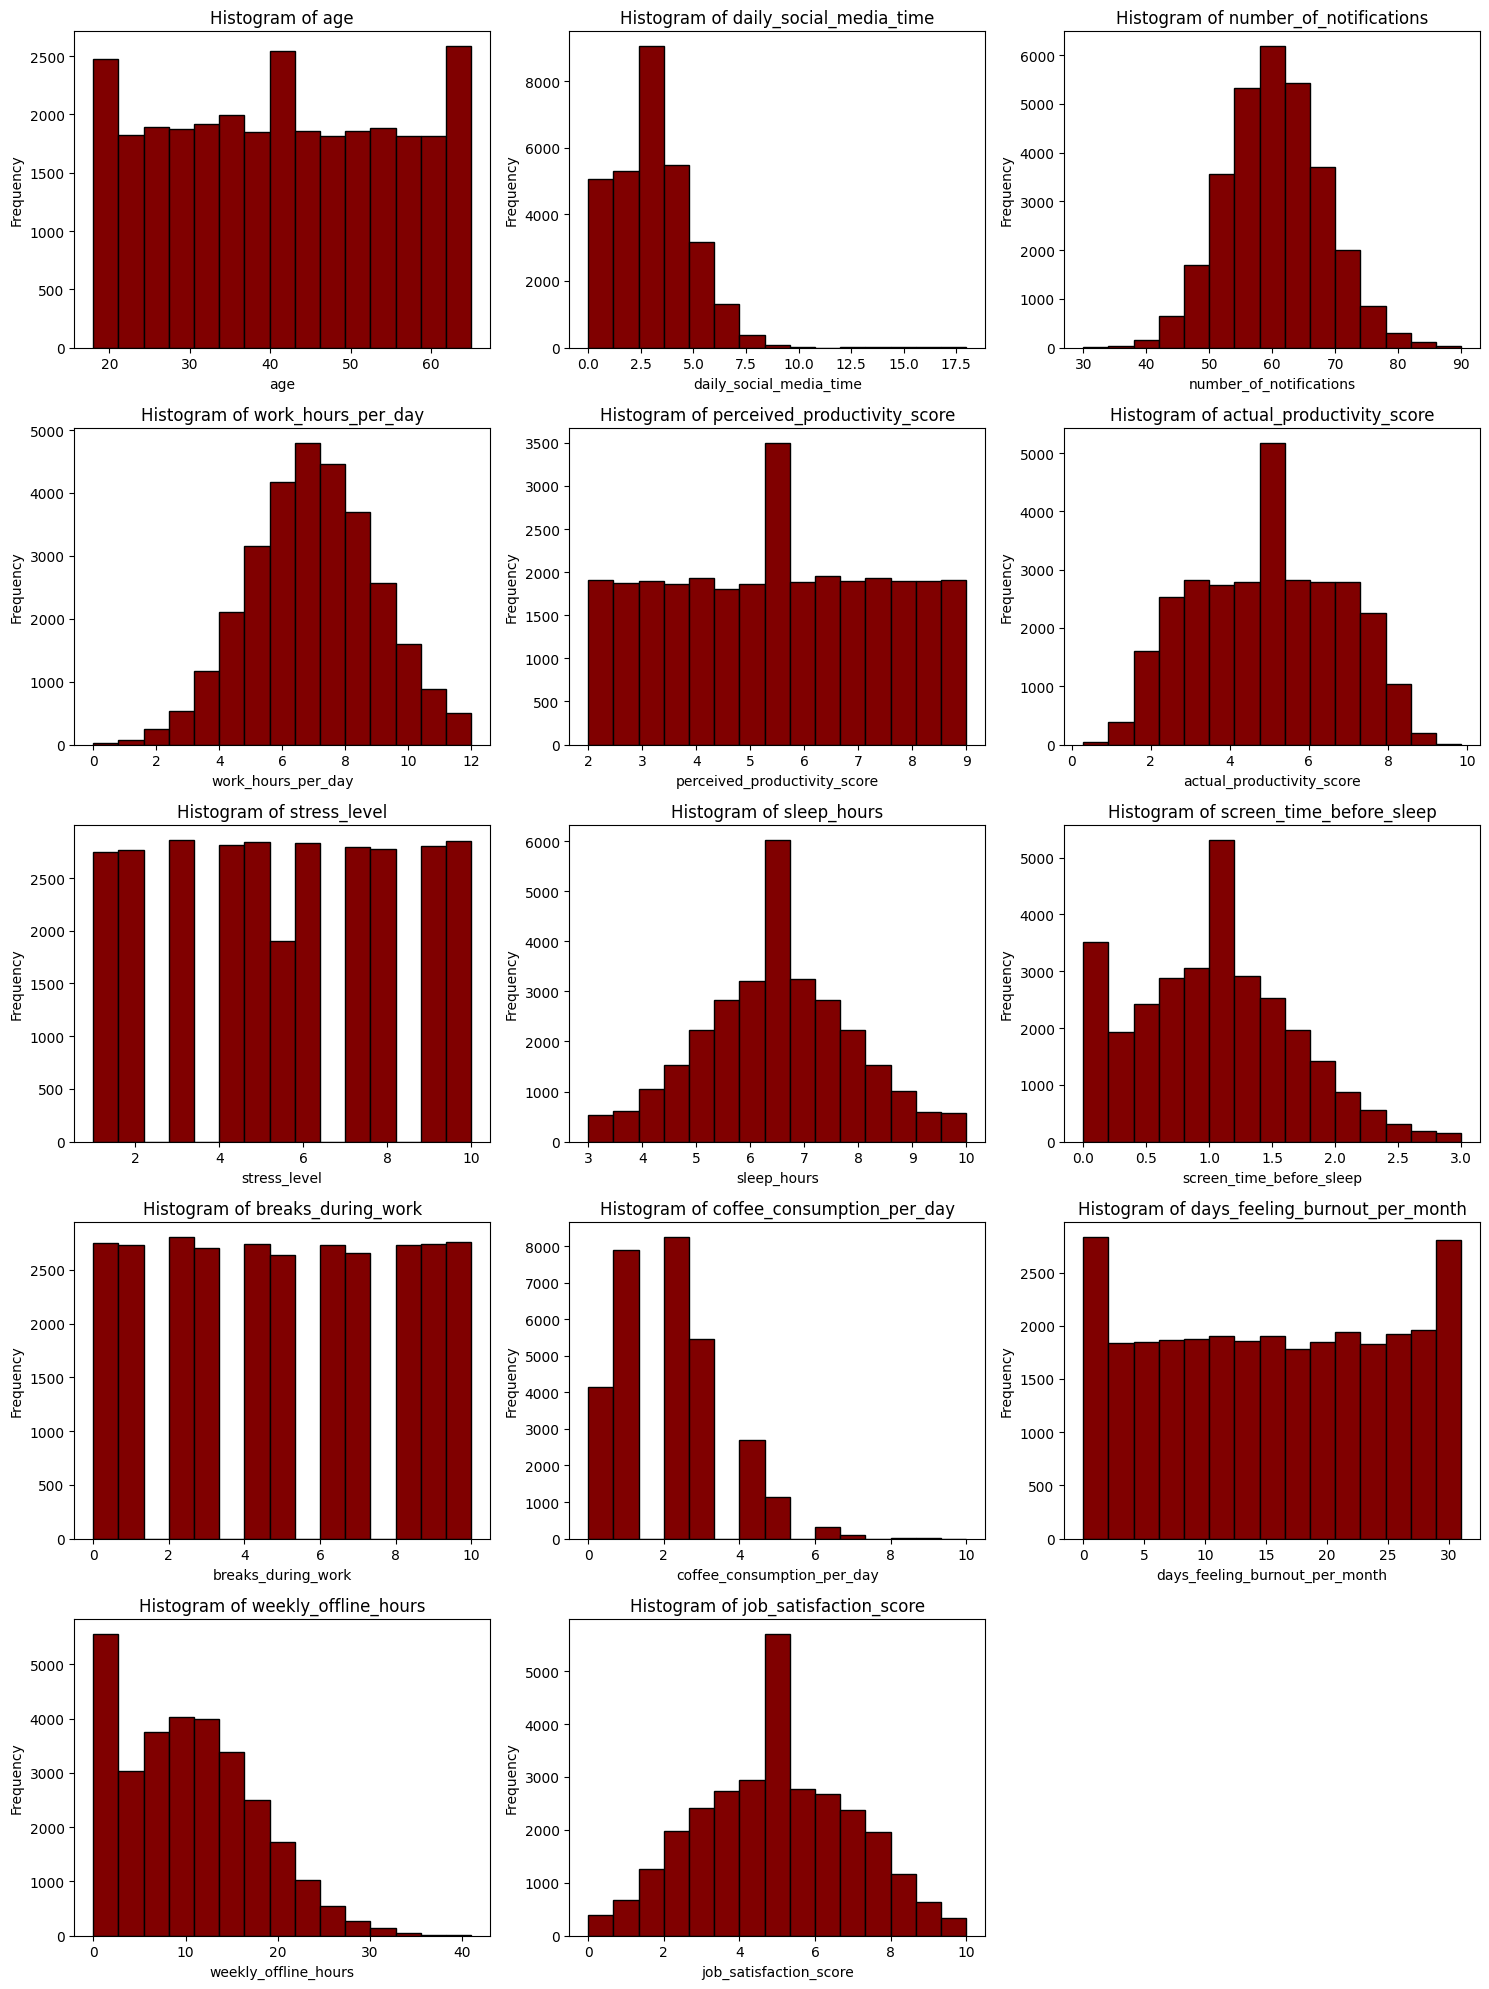

In [12]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='hist', color='maroon', bins=15, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

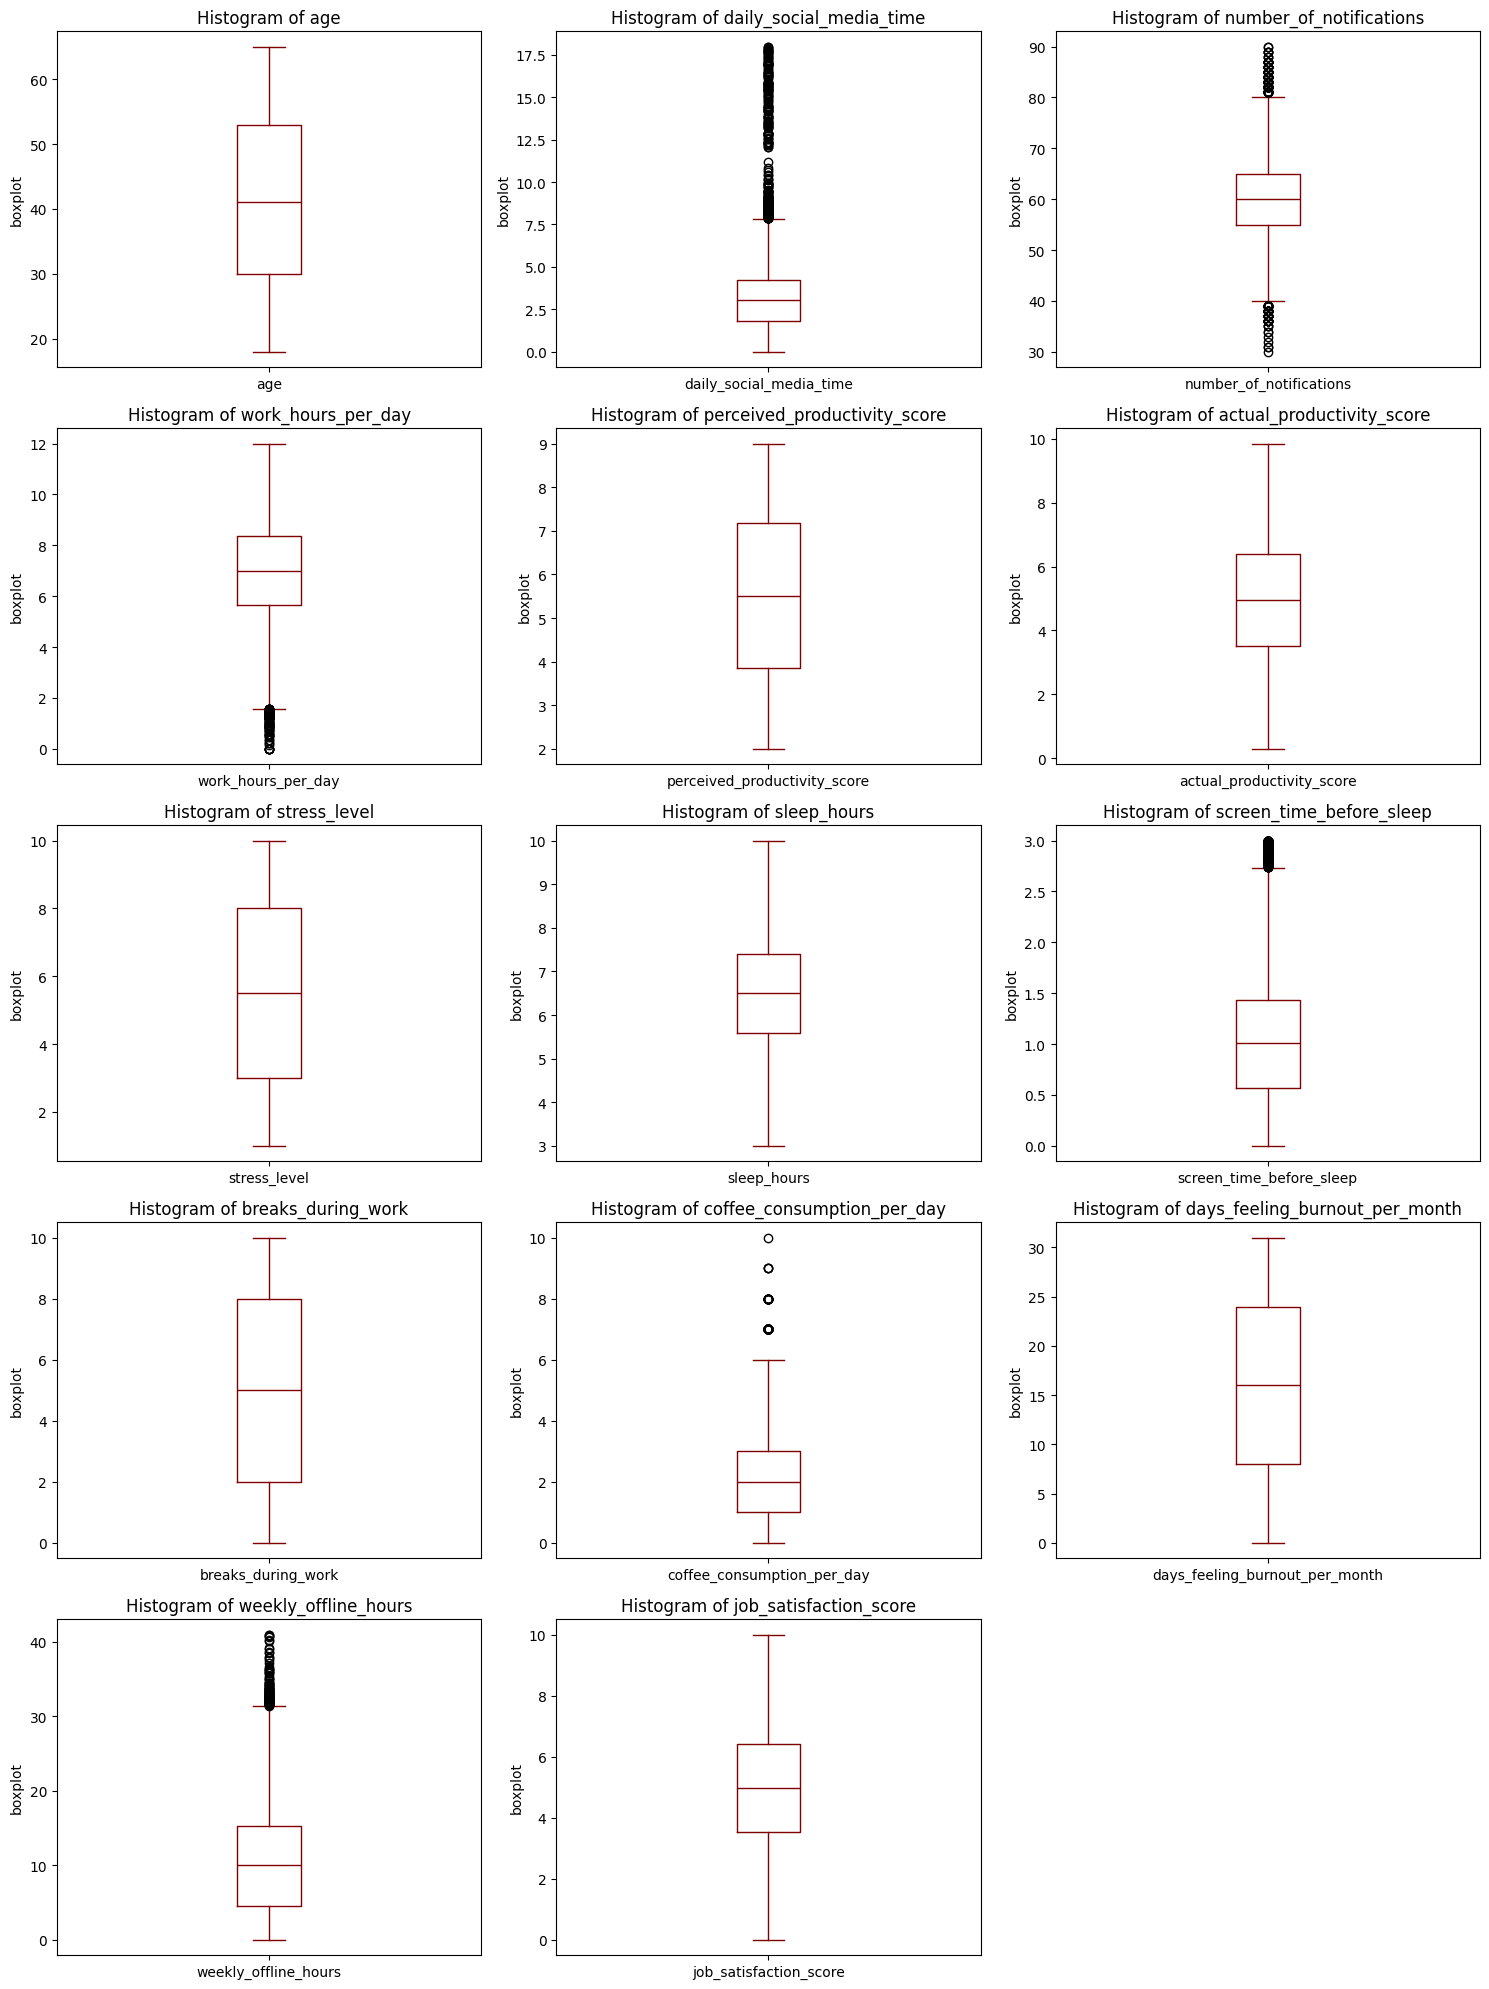

In [13]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(5, 3, i)
    df[col].plot(kind='box', color='maroon')
    plt.title(f'Histogram of {col}')
    plt.ylabel('boxplot')

plt.tight_layout()
plt.show()

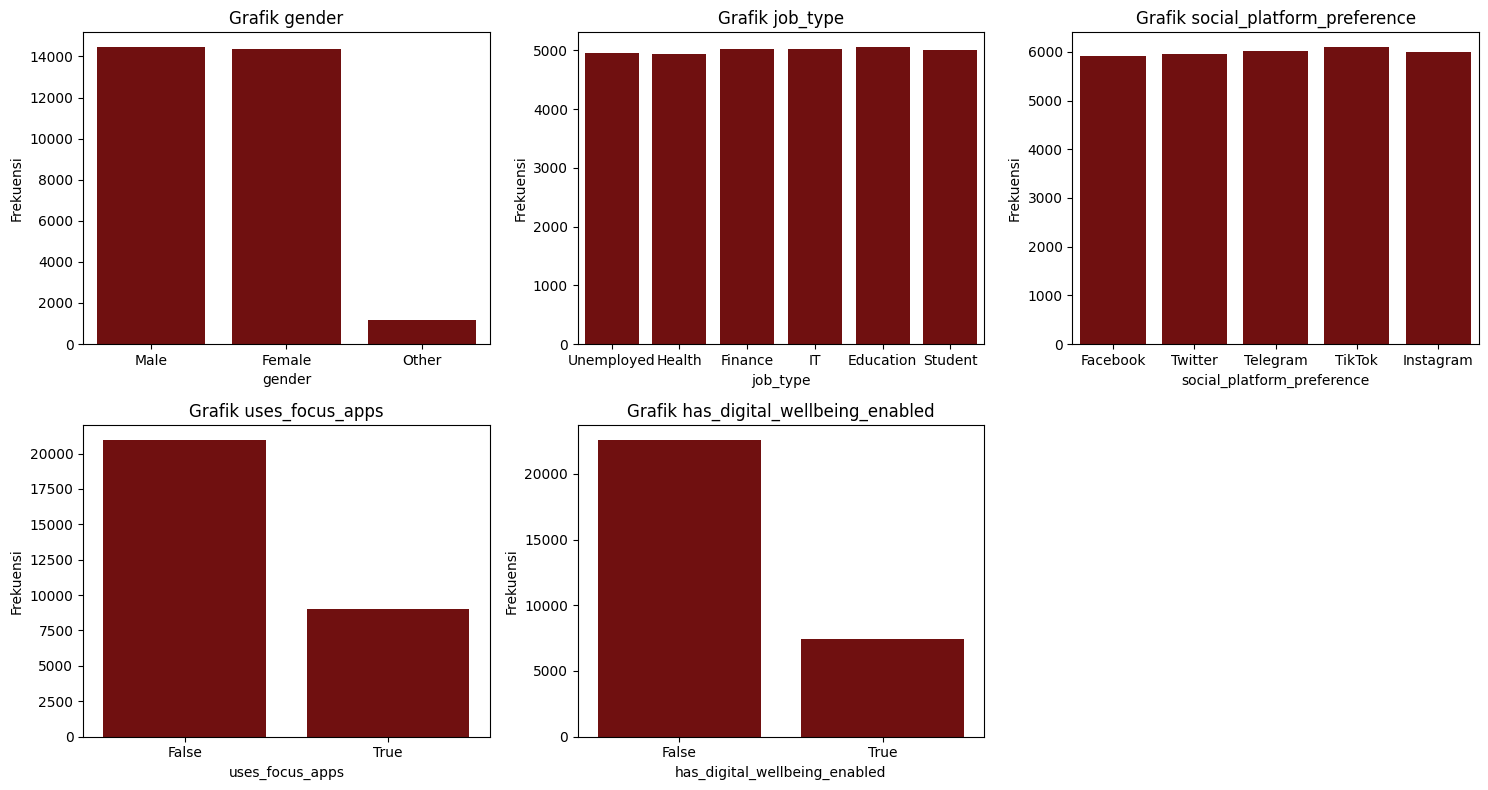

In [14]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, color='maroon' )
    plt.title(f'Grafik {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

In [15]:
df = df[df['gender']!='Other'].reset_index(drop=True)
df.shape

(28822, 19)

Multivariat & Transformasi

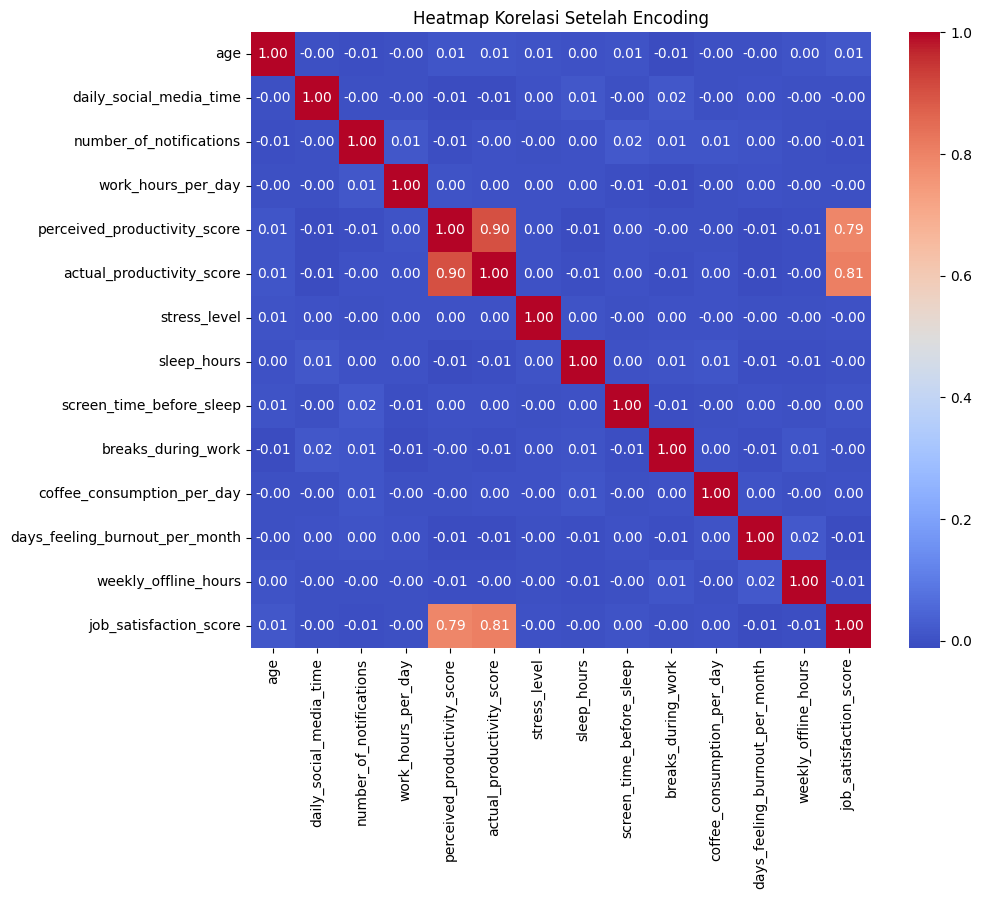

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in numeric_cols:
    df[col] = StandardScaler().fit_transform(df[[col]])

# Hitung korelasi untuk semua kolom
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Setelah Encoding")
plt.show()

In [17]:
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[[col]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [18]:
df_sample = df.head(200)
print(df_sample)

          age  gender  job_type  daily_social_media_time  \
0    1.049773       1         5                 0.544635   
1    0.326838       1         2                 0.072940   
2   -0.685271       1         1                -0.040353   
3    1.338947       0         5                -0.040353   
4   -1.191325       1         3                -0.040353   
..        ...     ...       ...                      ...   
195 -0.902151       0         0                -0.040353   
196  1.049773       0         2                 0.607204   
197 -1.625086       1         5                 1.712758   
198 -1.552793       1         1                -0.040353   
199  0.905186       0         4                 1.024985   

     social_platform_preference  number_of_notifications  work_hours_per_day  \
0                             0                 0.135596           -0.119231   
1                             4                -0.123033            1.088718   
2                             4        

# **Hierarchical Clustering Agglomerative**

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

class HierarchicalClustering:
    def __init__(self, linkage='average'):
        self.linkage = linkage
        self.clusters_ = None
        self.merge_history_ = []
        self.distances_ = []

    def euclidean_distance(self, point1, point2):
        """Menghitung jarak euclidean antara dua titik"""
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def calculate_cluster_distance(self, cluster1, cluster2, data):
        """Menghitung jarak antara dua cluster menggunakan average linkage"""
        if self.linkage == 'average':
            # Average linkage: rata-rata jarak semua pasangan titik
            distances = []
            for i in cluster1:
                for j in cluster2:
                    distances.append(self.euclidean_distance(data[i], data[j]))
            return np.mean(distances)
        elif self.linkage == 'single':
            # Single linkage: jarak minimum
            min_dist = float('inf')
            for i in cluster1:
                for j in cluster2:
                    dist = self.euclidean_distance(data[i], data[j])
                    if dist < min_dist:
                        min_dist = dist
            return min_dist

        elif self.linkage == 'complete':
            # Complete linkage: jarak maksimum
            max_dist = 0
            for i in cluster1:
                for j in cluster2:
                    dist = self.euclidean_distance(data[i], data[j])
                    if dist > max_dist:
                        max_dist = dist
            return max_dist

    def fit(self, X):
        """Melakukan hierarchical clustering"""
        n_samples = len(X)

        # Inisialisasi: setiap titik sebagai cluster sendiri
        clusters = [[i] for i in range(n_samples)]

        # Menyimpan history penggabungan
        merge_history = []
        distances = []

        while len(clusters) > 1:
            min_distance = float('inf')
            merge_indices = (0, 1)

            # Mencari pasangan cluster dengan jarak minimum
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    distance = self.calculate_cluster_distance(
                        clusters[i], clusters[j], X
                    )

                    if distance < min_distance:
                        min_distance = distance
                        merge_indices = (i, j)

            # Menggabungkan cluster yang memiliki jarak minimum
            i, j = merge_indices
            new_cluster = clusters[i] + clusters[j]

            # Menyimpan informasi penggabungan
            merge_history.append((clusters[i].copy(), clusters[j].copy(), min_distance))
            distances.append(min_distance)

            # Menghapus cluster lama dan menambah cluster baru
            # Hapus cluster dengan indeks lebih besar dulu
            if i < j:
                clusters.pop(j)
                clusters.pop(i)
            else:
                clusters.pop(i)
                clusters.pop(j)

            clusters.append(new_cluster)

        self.merge_history_ = merge_history
        self.distances_ = distances
        self.final_cluster_ = clusters[0]

        return self

    def fit(self, X):
        """Melakukan hierarchical clustering"""
        n_samples = len(X)

        # Inisialisasi: setiap titik sebagai cluster sendiri
        clusters = [[i] for i in range(n_samples)]

        # Menyimpan history penggabungan
        merge_history = []
        distances = []

        while len(clusters) > 1:
            min_distance = float('inf')
            merge_indices = (0, 1)

            # Mencari pasangan cluster dengan jarak minimum
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    distance = self.calculate_cluster_distance(
                        clusters[i], clusters[j], X
                    )

                    if distance < min_distance:
                        min_distance = distance
                        merge_indices = (i, j)

            # Menggabungkan cluster yang memiliki jarak minimum
            i, j = merge_indices
            new_cluster = clusters[i] + clusters[j]

            # Menyimpan informasi penggabungan
            merge_history.append((clusters[i].copy(), clusters[j].copy(), min_distance))
            distances.append(min_distance)

            # Menghapus cluster lama dan menambah cluster baru
            # Hapus cluster dengan indeks lebih besar dulu
            if i < j:
                clusters.pop(j)
                clusters.pop(i)
            else:
                clusters.pop(i)
                clusters.pop(j)

            clusters.append(new_cluster)

        self.merge_history_ = merge_history
        self.distances_ = distances
        self.final_cluster_ = clusters[0]

        return self

    def get_clusters(self, n_clusters):
        """Mendapatkan assignment cluster untuk n_clusters tertentu"""
        if n_clusters <= 0:
            raise ValueError("Number of clusters must be positive")

        # Mulai dari cluster akhir dan bagi mundur
        current_clusters = [self.final_cluster_.copy()]

        # Mundur dalam merge history untuk mendapatkan n_clusters
        merge_idx = len(self.merge_history_) - 1

        while len(current_clusters) < n_clusters and merge_idx >= 0:
            # Cari cluster yang perlu dipecah
            cluster1, cluster2, _ = self.merge_history_[merge_idx]
            merged_cluster_indices = set(cluster1 + cluster2)

            # Cari posisi cluster yang perlu dipecah
            for i, cluster in enumerate(current_clusters):
                if merged_cluster_indices.issubset(set(cluster)):
                    # Ganti cluster yang digabung dengan dua cluster asli
                    current_clusters.pop(i)
                    current_clusters.append(cluster1)
                    current_clusters.append(cluster2)
                    break

            merge_idx -= 1

        # Buat assignment array
        n_samples = len(self.final_cluster_)
        labels = np.zeros(n_samples, dtype=int)

        for cluster_id, cluster in enumerate(current_clusters):
            for point_idx in cluster:
                labels[point_idx] = cluster_id

        return labels

In [21]:
def plot_dendrogram_simple(clustering, max_display=20):
    """Membuat dendrogram sederhana"""
    distances = clustering.distances_
    n_merges = len(distances)

    # Hanya tampilkan beberapa merge terakhir untuk readability
    start_idx = max(0, n_merges - max_display)

    plt.figure(figsize=(12, 6))

    # Plot sebagai bar chart untuk simplicity
    merge_steps = range(start_idx, n_merges)
    merge_distances = distances[start_idx:]

    plt.bar(merge_steps, merge_distances, alpha=0.7)
    plt.xlabel('Merge Step')
    plt.ylabel('Distance')
    plt.title('Hierarchical Clustering Dendrogram (Simplified)')
    plt.xticks(merge_steps)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [22]:
def analyze_clusters(df, labels, n_clusters):
    """Analisis karakteristik setiap cluster"""
    df_analysis = df.copy()
    df_analysis['cluster'] = labels

    print(f"\n=== ANALISIS {n_clusters} CLUSTERS ===")
    print(f"Distribusi cluster:")
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    for cluster_id, count in cluster_counts.items():
        print(f"Cluster {cluster_id}: {count} samples ({count/len(labels)*100:.1f}%)")

    # Analisis rata-rata setiap cluster untuk kolom numerik
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    print(f"\nKarakteristik rata-rata setiap cluster:")
    for cluster_id in sorted(df_analysis['cluster'].unique()):
        cluster_data = df_analysis[df_analysis['cluster'] == cluster_id]
        print(f"\nCluster {cluster_id}:")
        for col in numeric_columns:
            mean_val = cluster_data[col].mean()
            print(f"  {col}: {mean_val:.2f}")

In [23]:
def plot_cluster_comparison(df, labels, features_to_plot):
    """Plot perbandingan antar cluster untuk features tertentu"""
    df_plot = df.copy()
    df_plot['cluster'] = labels

    n_features = len(features_to_plot)
    fig, axes = plt.subplots(2, (n_features + 1) // 2, figsize=(15, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        if i < len(axes):
            df_plot.boxplot(column=feature, by='cluster', ax=axes[i])
            axes[i].set_title(f'{feature} by Cluster')
            axes[i].set_xlabel('Cluster')

    # Hide unused subplots
    for i in range(len(features_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

In [33]:
import numpy as np

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manual_silhouette_score(X, labels):
    n = len(X)
    X = np.array(X)
    labels = np.array(labels)
    unique_labels = np.unique(labels)
    silhouette_scores = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == l] for l in unique_labels if l != labels[i]]

        # a(i): mean intra-cluster distance
        a = np.mean([euclidean(X[i], point) for point in same_cluster if not np.array_equal(point, X[i])])

        # b(i): min mean distance to other clusters
        b = np.min([
            np.mean([euclidean(X[i], point) for point in cluster])
            for cluster in other_clusters
        ])

        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores.append(s)

    return np.mean(silhouette_scores)


In [34]:
def manual_davies_bouldin_index(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    unique_labels = np.unique(labels)
    k = len(unique_labels)

    centroids = []
    sigmas = []

    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
        sigma = np.mean([euclidean(p, centroid) for p in cluster_points])
        sigmas.append(sigma)

    db_indexes = []
    for i in range(k):
        max_rij = 0
        for j in range(k):
            if i != j:
                numerator = sigmas[i] + sigmas[j]
                denominator = euclidean(centroids[i], centroids[j])
                rij = numerator / denominator if denominator > 0 else 0
                max_rij = max(max_rij, rij)
        db_indexes.append(max_rij)

    return np.mean(db_indexes)

# **Clustering w/ PCA**

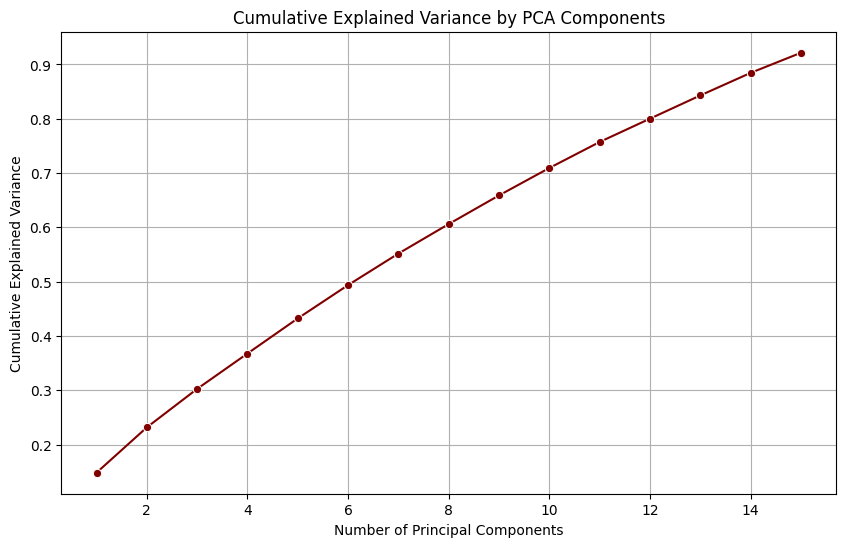

Top 3 fitur paling berpengaruh untuk tiap principal component:
                            PC1                         PC2  \
0     actual_productivity_score                      gender   
1  perceived_productivity_score  social_platform_preference   
2        job_satisfaction_score                 sleep_hours   

                              PC3                      PC4  \
0  days_feeling_burnout_per_month       work_hours_per_day   
1                    stress_level             stress_level   
2                     sleep_hours  daily_social_media_time   

                          PC5                       PC6  \
0     number_of_notifications      weekly_offline_hours   
1  coffee_consumption_per_day                       age   
2             uses_focus_apps  screen_time_before_sleep   

                       PC7                 PC8                         PC9  \
0  number_of_notifications     uses_focus_apps                         age   
1       breaks_during_work            job_

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns


# 1. Standarisasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_sample[numeric_cols]) # Select data using numeric_cols

# 2. PCA
pca = PCA(n_components=0.90)
pca_components = pca.fit_transform(scaled_data)

# 3. Variance Explained
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# 4. Visualisasi Variance Explained
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_var)+1), y=cumulative_var, marker='o', color='maroon')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# 5. Membuat Loading Matrix untuk melihat kontribusi fitur terhadap setiap komponen
loadings = pd.DataFrame(pca.components_.T,  # transpose supaya baris = fitur, kolom = komponen
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=numeric_cols)

# 6. Menampilkan 3 fitur terpenting untuk setiap komponen utama
top_features_per_pc = {}

for i in range(pca.n_components_):
    pc = f'PC{i+1}'
    top_features = loadings[pc].abs().sort_values(ascending=False).head(3)
    top_features_per_pc[pc] = top_features.index.tolist()

# 7. Konversi ke DataFrame agar mudah dilihat
top_features_df = pd.DataFrame(top_features_per_pc)
print("Top 3 fitur paling berpengaruh untuk tiap principal component:")
print(top_features_df)


In [24]:
# --- 2. Standardisasi
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(pca_components)

# 3. Hierarchical Clustering
print("\n3. Performing hierarchical clustering...")
clustering = HierarchicalClustering(linkage='average')
clustering.fit(scaled_data2)
# Ubah jumlah cluster sesuai kebutuhan
labels = clustering.get_clusters(n_clusters=3)
print(f"Clustering completed. Total merges: {len(clustering.distances_)}")



3. Performing hierarchical clustering...
Clustering completed. Total merges: 199


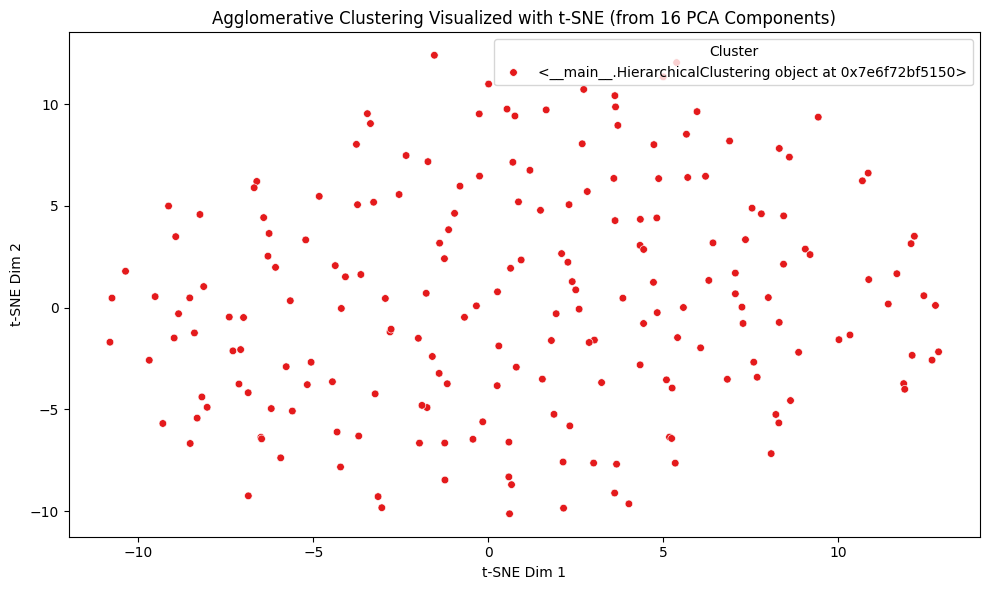

In [27]:
from sklearn.manifold import TSNE

# Jalankan t-SNE dari 16 komponen PCA ke 2 dimensi
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(pca_components)

# Buat DataFrame hasil
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Clustering'] = clustering

# Plot hasil t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Clustering', palette='Set1', s=30)
plt.title("Agglomerative Clustering Visualized with t-SNE (from 16 PCA Components)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [35]:
labels = clustering.get_clusters(n_clusters=3)
sil_score = manual_silhouette_score(scaled_data2, labels)
db_index = manual_davies_bouldin_index(scaled_data2, labels)

print(f"Manual Silhouette Score: {sil_score:.4f}")
print(f"Manual DB Index: {db_index:.4f}")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Manual Silhouette Score: 0.0808
Manual DB Index: 1.2415


# **Clustering dengan memisahkan Outlier pada cluster sendiri**

In [36]:
from sklearn.ensemble import IsolationForest
# Langkah 1: Deteksi outlier dengan Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(pca_components)

# -1 adalah outlier, 1 adalah inlier
mask_inlier = outlier_labels == 1
mask_outlier = outlier_labels == -1

In [39]:
# --- 2. Standardisasi
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(pca_components[mask_inlier])

# 3. Hierarchical Clustering
print("\n3. Performing hierarchical clustering...")
cluster_inlier = HierarchicalClustering(linkage='average')
cluster_inlier.fit(scaled_data2)
# Ubah jumlah cluster sesuai kebutuhan
labels = cluster_inlier.get_clusters(n_clusters=3)
print(f"Clustering completed. Total merges: {len(cluster_inlier.distances_)}")



3. Performing hierarchical clustering...
Clustering completed. Total merges: 189


<ipython-input-41-3575839477>:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Cluster', palette=palette, s=30)


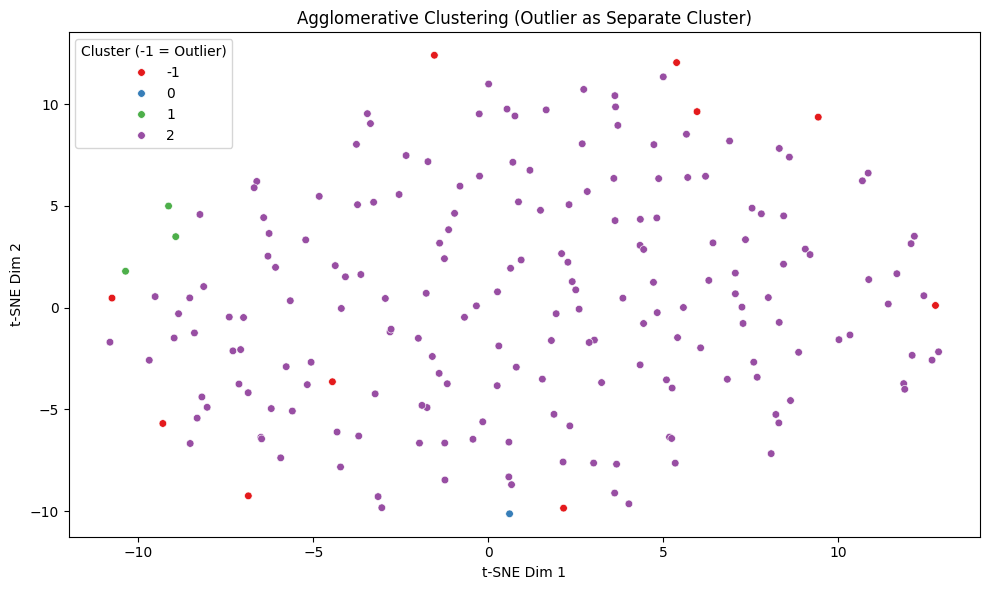

In [41]:
# --- 4. Gabungkan label inlier dan tandai outlier sebagai -1
cluster_full = np.full(pca_components.shape[0], -1)  # default -1 untuk outlier
cluster_full[mask_inlier] = labels  # isikan hasil klaster ke inlier

# --- 5. Visualisasi dengan t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(pca_components)

tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Cluster'] = cluster_full

# --- 6. Plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set1", n_colors=4) + [(0.6, 0.6, 0.6)]  # tambah abu untuk outlier
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Cluster', palette=palette, s=30)
plt.title("Agglomerative Clustering (Outlier as Separate Cluster)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster (-1 = Outlier)")
plt.tight_layout()
plt.show()

In [42]:
# Masking outlier
mask_valid = cluster_full != -1
valid_data = scaled_data2  # ini sudah untuk inlier
valid_labels = cluster_full[mask_valid]  # hanya label yang bukan -1

# Evaluasi hanya untuk data valid
sil_score = manual_silhouette_score(valid_data, valid_labels)
db_index = manual_davies_bouldin_index(valid_data, valid_labels)

print(f"Silhouette Score (excluding outliers): {sil_score:.4f}")
print(f"Davies-Bouldin Index (excluding outliers): {db_index:.4f}")


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Silhouette Score (excluding outliers): 0.0674
Davies-Bouldin Index (excluding outliers): 1.4996


# **Clustering Tanpa Outlier**

In [43]:
# 1. Ambil data inlier saja
inlier_data = pca_components[mask_inlier]

# 2. Standardisasi data inlier
scaler = StandardScaler()
scaled_inlier_data = scaler.fit_transform(inlier_data)

# 3. Clustering pada data inlier
print("Clustering inliers dengan HierarchicalClustering...")
cluster_no = HierarchicalClustering(linkage='average')
cluster_no.fit(scaled_inlier_data)
inlier_labels = cluster_no.get_clusters(n_clusters=3)
print(f"Clustering selesai. Total merges: {len(cluster_no.distances_)}")

Clustering inliers dengan HierarchicalClustering...
Clustering selesai. Total merges: 189


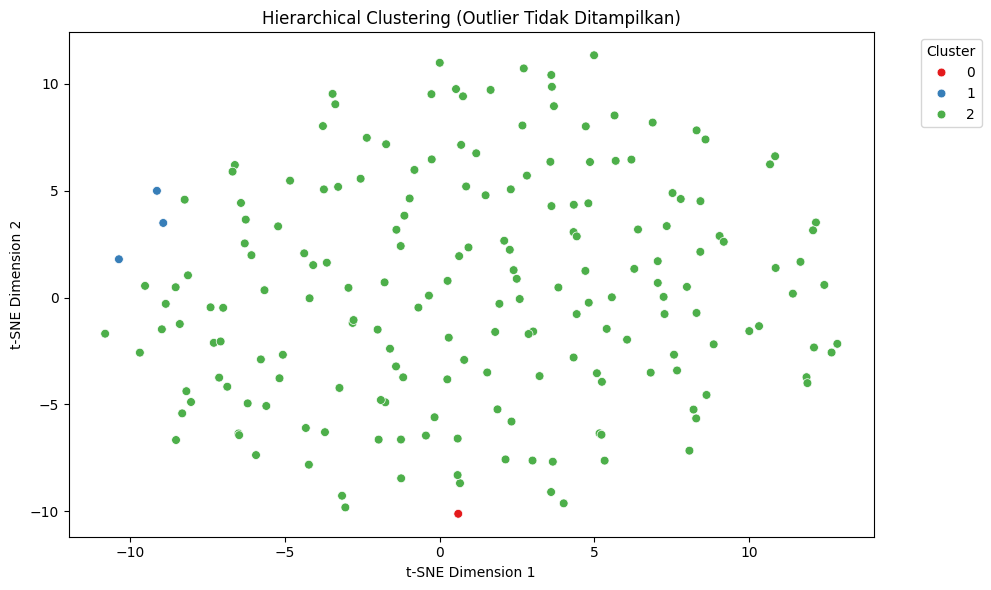

In [45]:
# 4. Sisipkan hasil klaster ke seluruh data
cluster_full2 = np.full(pca_components.shape[0], -1)  # default -1 untuk outlier
cluster_full2[mask_inlier] = inlier_labels  # masukkan label hasil clustering untuk inlier

# 5. Visualisasi t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(pca_components)

# Buat DataFrame untuk plotting
tsne_df = pd.DataFrame(tsne_result, columns=["Dim1", "Dim2"])
tsne_df["Cluster"] = cluster_full2

# Hanya tampilkan inlier (Cluster != -1)
tsne_df_inlier = tsne_df[tsne_df["Cluster"] != -1]

# 6. Plot inlier saja
plt.figure(figsize=(10, 6))
n_clusters = len(np.unique(tsne_df_inlier["Cluster"]))
palette = sns.color_palette("Set1", n_colors=n_clusters)

sns.scatterplot(data=tsne_df_inlier, x="Dim1", y="Dim2", hue="Cluster", palette=palette, s=40)
plt.title("Hierarchical Clustering (Outlier Tidak Ditampilkan)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluasi
sil_score = silhouette_score(scaled_inlier_data, inlier_labels)
db_index = davies_bouldin_score(scaled_inlier_data, inlier_labels)

# Tampilkan hasil
print(f"Silhouette Score (tanpa outlier): {sil_score:.4f}")
print(f"Davies-Bouldin Index (tanpa outlier): {db_index:.4f}")


Silhouette Score (tanpa outlier): 0.0674
Davies-Bouldin Index (tanpa outlier): 1.4996


# Cluster w/ Fitur2 Baru

In [48]:
#Productivity Gap : Apakah persepsi diri sesuai dengan kenyataan produktivitas
df_sample["productivity_gap"] = df_sample["perceived_productivity_score"] - df_sample["actual_productivity_score"]

<ipython-input-48-1877767358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["productivity_gap"] = df_sample["perceived_productivity_score"] - df_sample["actual_productivity_score"]


In [50]:
#Screen Time to Sleep ratio : apakah screen time mengganggu waktu tidur
df_sample["screen_sleep_ratio"] = df_sample["screen_time_before_sleep"] / df_sample["sleep_hours"]
df_sample["screen_sleep_ratio"].replace([float("inf"), -float("inf")], 0, inplace=True)

<ipython-input-50-319575547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["screen_sleep_ratio"] = df_sample["screen_time_before_sleep"] / df_sample["sleep_hours"]
<ipython-input-50-319575547>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample["screen_sleep_ratio"].r

In [51]:
# Apakah istirahat cukup relatif terhadap burnout

df_sample["burnout_to_break_ratio"] = df_sample["days_feeling_burnout_per_month"] / (df_sample['breaks_during_work'] + 1)

<ipython-input-51-3365359106>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["burnout_to_break_ratio"] = df_sample["days_feeling_burnout_per_month"] / (df_sample['breaks_during_work'] + 1)


In [52]:
# Coffee Consumption per Work Hour

df_sample["coffee_per_hour"] = df_sample["coffee_consumption_per_day"] / df_sample["work_hours_per_day"]

<ipython-input-52-528180423>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["coffee_per_hour"] = df_sample["coffee_consumption_per_day"] / df_sample["work_hours_per_day"]


In [53]:
# Offline Ratio (weekly offline hours / total weekly hours)

df_sample["offline_ratio"] = df_sample["weekly_offline_hours"] / (7 * 24)

<ipython-input-53-2224922442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["offline_ratio"] = df_sample["weekly_offline_hours"] / (7 * 24)


In [54]:
# Social media ratio

df_sample["social_media_ratio"] = df_sample["daily_social_media_time"] / df_sample["work_hours_per_day"]

<ipython-input-54-1481683126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["social_media_ratio"] = df_sample["daily_social_media_time"] / df_sample["work_hours_per_day"]


In [55]:
# focus support level : Seberapa proaktif seseorang mengelola distraksi

df_sample['focus_support_level'] = df_sample['uses_focus_apps'] + df_sample['has_digital_wellbeing_enabled']

<ipython-input-55-3210479076>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['focus_support_level'] = df_sample['uses_focus_apps'] + df_sample['has_digital_wellbeing_enabled']


In [57]:
print(df_sample[["productivity_gap", "screen_sleep_ratio", "burnout_to_break_ratio", "coffee_per_hour", "offline_ratio", "social_media_ratio", "focus_support_level"]].head())

   productivity_gap  screen_sleep_ratio  burnout_to_break_ratio  \
0         -0.007889            0.971754               -0.252655   
1         -0.345261            0.561593                0.624470   
2         -0.021482           -0.427029               -0.272376   
3          0.436886           -0.891927                4.856561   
4          1.705012           -1.727187               -6.069003   

   coffee_per_hour  offline_ratio  social_media_ratio  focus_support_level  
0       -11.891563       0.009464           -4.567915                    0  
1        -0.000769      -0.008461            0.066996                    2  
2         1.541881      -0.000023           -0.087819                    1  
3         4.456736       0.011058            0.126694                    0  
4         1.825737       0.000248            0.103741                    1  


In [58]:
# 1. Daftar fitur akhir yang ingin dipakai
final_features = [
    "productivity_gap",
    "screen_sleep_ratio",
    "burnout_to_break_ratio",
    "coffee_per_hour",
    "offline_ratio",
    "social_media_ratio",
    "focus_support_level",
    "age",
    "gender",
    "job_type",
    "job_satisfaction_score"
]

# 2. Ambil data dari DataFrame utama
selected_df = df_sample[final_features].copy()

# 3. One-hot encoding untuk fitur kategorikal
categorical_cols = ["gender", "job_type"]
encoded_df = pd.get_dummies(selected_df, columns=categorical_cols, drop_first=True)

# 4. Bersihkan data dari NaN dan infinite
encoded_df.replace([np.inf, -np.inf], np.nan, inplace=True)
encoded_df.dropna(inplace=True)

# 5. Tampilkan hasil
print(encoded_df.head())

   productivity_gap  screen_sleep_ratio  burnout_to_break_ratio  \
0         -0.007889            0.971754               -0.252655   
1         -0.345261            0.561593                0.624470   
2         -0.021482           -0.427029               -0.272376   
3          0.436886           -0.891927                4.856561   
4          1.705012           -1.727187               -6.069003   

   coffee_per_hour  offline_ratio  social_media_ratio  focus_support_level  \
0       -11.891563       0.009464           -4.567915                    0   
1        -0.000769      -0.008461            0.066996                    2   
2         1.541881      -0.000023           -0.087819                    1   
3         4.456736       0.011058            0.126694                    0   
4         1.825737       0.000248            0.103741                    1   

        age  job_satisfaction_score  gender_1  job_type_1  job_type_2  \
0  1.049773                0.676131      True       Fal

In [59]:
print(encoded_df)

     productivity_gap  screen_sleep_ratio  burnout_to_break_ratio  \
0           -0.007889            0.971754               -0.252655   
1           -0.345261            0.561593                0.624470   
2           -0.021482           -0.427029               -0.272376   
3            0.436886           -0.891927                4.856561   
4            1.705012           -1.727187               -6.069003   
..                ...                 ...                     ...   
195         -0.251341            2.223572               -1.027586   
196          0.085706           -3.754307               -0.484150   
197         -0.143052            0.970988                4.436347   
198          0.171128            1.489361                0.095407   
199         -0.175079           -0.047741               -0.490700   

     coffee_per_hour  offline_ratio  social_media_ratio  focus_support_level  \
0         -11.891563       0.009464           -4.567915                    0   
1          

In [60]:
# --- 2. Standardisasi
scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(encoded_df)

# 3. Hierarchical Clustering
print("\n3. Performing hierarchical clustering...")
clustering = HierarchicalClustering(linkage='average')
clustering.fit(scaled_data2)
# Ubah jumlah cluster sesuai kebutuhan
labels = clustering.get_clusters(n_clusters=3)
print(f"Clustering completed. Total merges: {len(clustering.distances_)}")


3. Performing hierarchical clustering...
Clustering completed. Total merges: 199


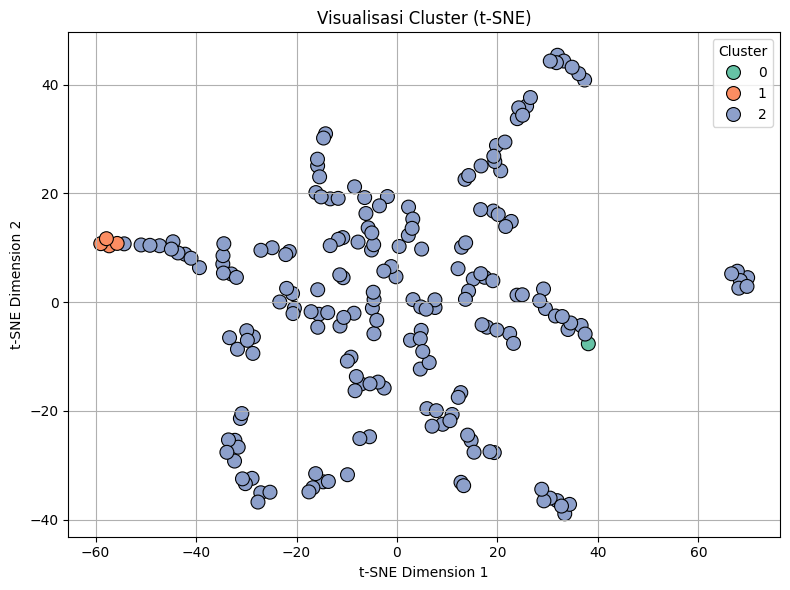

In [61]:
from sklearn.manifold import TSNE

def plot_tsne_visualization(data, labels, title="Visualisasi Cluster (t-SNE)"):
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    tsne_result = tsne.fit_transform(data)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
    df_tsne['Cluster'] = labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_tsne,
        x='Dim1', y='Dim2',
        hue='Cluster',
        palette='Set2',
        s=100,
        edgecolor='k'
    )
    plt.title(title)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Panggil jika ingin pakai t-SNE:
plot_tsne_visualization(encoded_df, labels)

In [62]:
import numpy as np
print("Jumlah cluster unik:", len(np.unique(labels)))
print("Label cluster:", np.unique(labels))

Jumlah cluster unik: 3
Label cluster: [0 1 2]



4. Creating dendrogram...


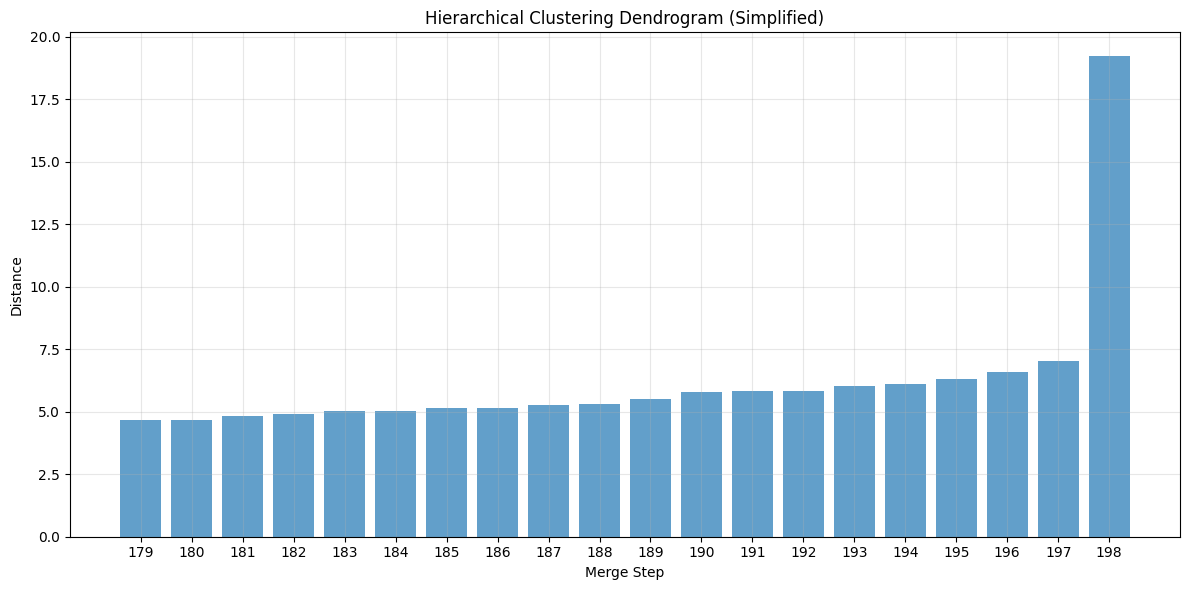

In [63]:
# 4. Plot dendrogram
print("\n4. Creating dendrogram...")
plot_dendrogram_simple(clustering)


=== ANALISIS 3 CLUSTERS ===
Distribusi cluster:
Cluster 0: 1 samples (0.5%)
Cluster 1: 4 samples (2.0%)
Cluster 2: 195 samples (97.5%)

Karakteristik rata-rata setiap cluster:

Cluster 0:
  productivity_gap: -1.54
  screen_sleep_ratio: 1.83
  burnout_to_break_ratio: 6.12
  coffee_per_hour: 189.10
  offline_ratio: 0.00
  social_media_ratio: 218.75
  focus_support_level: 1.00
  age: 0.04
  job_satisfaction_score: -0.00

Cluster 1:
  productivity_gap: 0.10
  screen_sleep_ratio: -4183.02
  burnout_to_break_ratio: -0.23
  coffee_per_hour: -0.63
  offline_ratio: 0.00
  social_media_ratio: 0.34
  focus_support_level: 0.25
  age: -0.16
  job_satisfaction_score: -0.53

Cluster 2:
  productivity_gap: 0.01
  screen_sleep_ratio: 98.67
  burnout_to_break_ratio: 0.38
  coffee_per_hour: -0.24
  offline_ratio: 0.00
  social_media_ratio: -0.86
  focus_support_level: 0.65
  age: 0.01
  job_satisfaction_score: -0.05


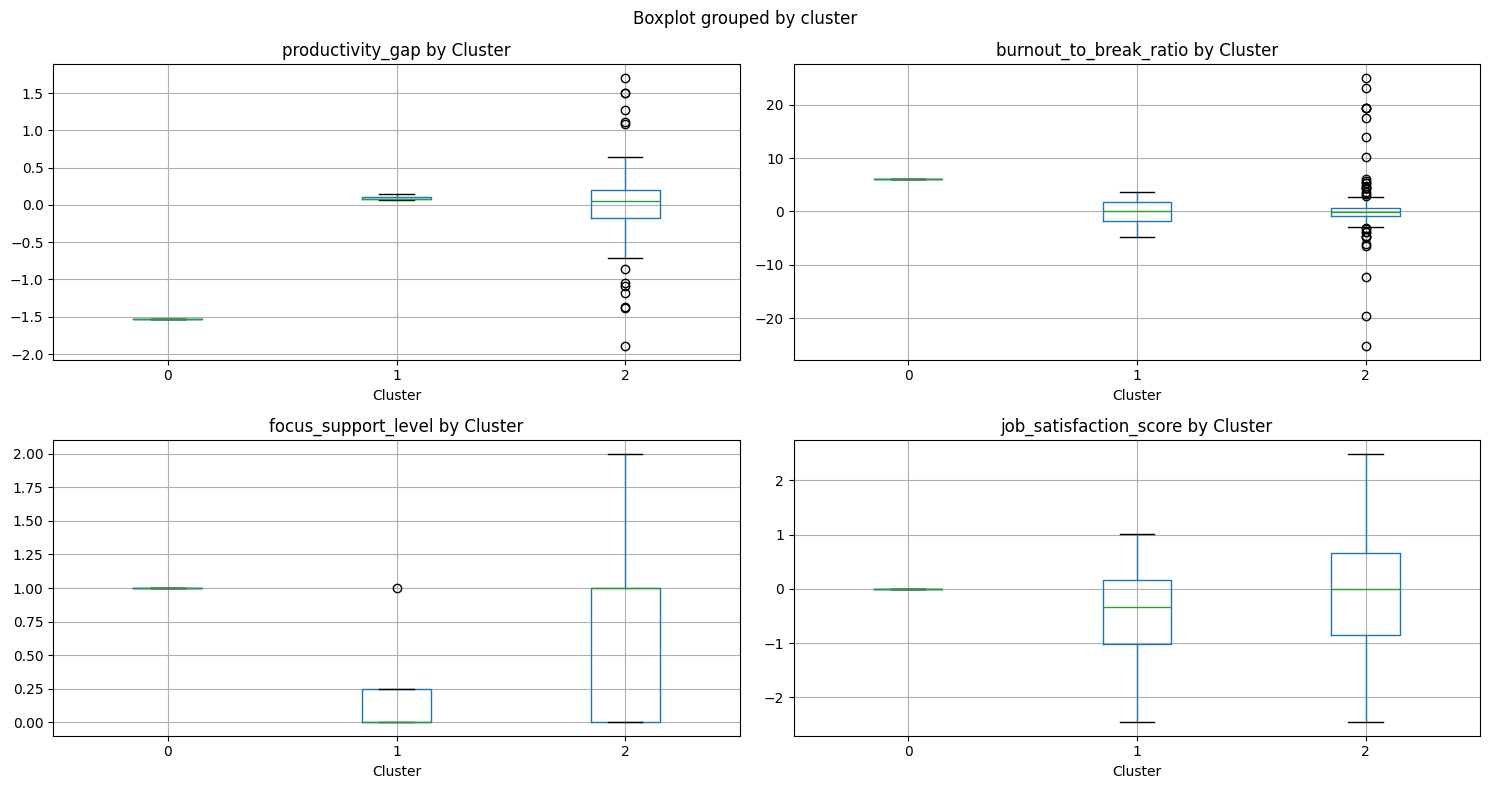


=== ANALISIS 4 CLUSTERS ===
Distribusi cluster:
Cluster 0: 1 samples (0.5%)
Cluster 1: 4 samples (2.0%)
Cluster 2: 2 samples (1.0%)
Cluster 3: 193 samples (96.5%)

Karakteristik rata-rata setiap cluster:

Cluster 0:
  productivity_gap: -1.54
  screen_sleep_ratio: 1.83
  burnout_to_break_ratio: 6.12
  coffee_per_hour: 189.10
  offline_ratio: 0.00
  social_media_ratio: 218.75
  focus_support_level: 1.00
  age: 0.04
  job_satisfaction_score: -0.00

Cluster 1:
  productivity_gap: 0.10
  screen_sleep_ratio: -4183.02
  burnout_to_break_ratio: -0.23
  coffee_per_hour: -0.63
  offline_ratio: 0.00
  social_media_ratio: 0.34
  focus_support_level: 0.25
  age: -0.16
  job_satisfaction_score: -0.53

Cluster 2:
  productivity_gap: 0.09
  screen_sleep_ratio: 0.02
  burnout_to_break_ratio: -22.45
  coffee_per_hour: -1.72
  offline_ratio: 0.00
  social_media_ratio: -0.17
  focus_support_level: 1.00
  age: -0.25
  job_satisfaction_score: 0.69

Cluster 3:
  productivity_gap: 0.01
  screen_sleep_ratio: 

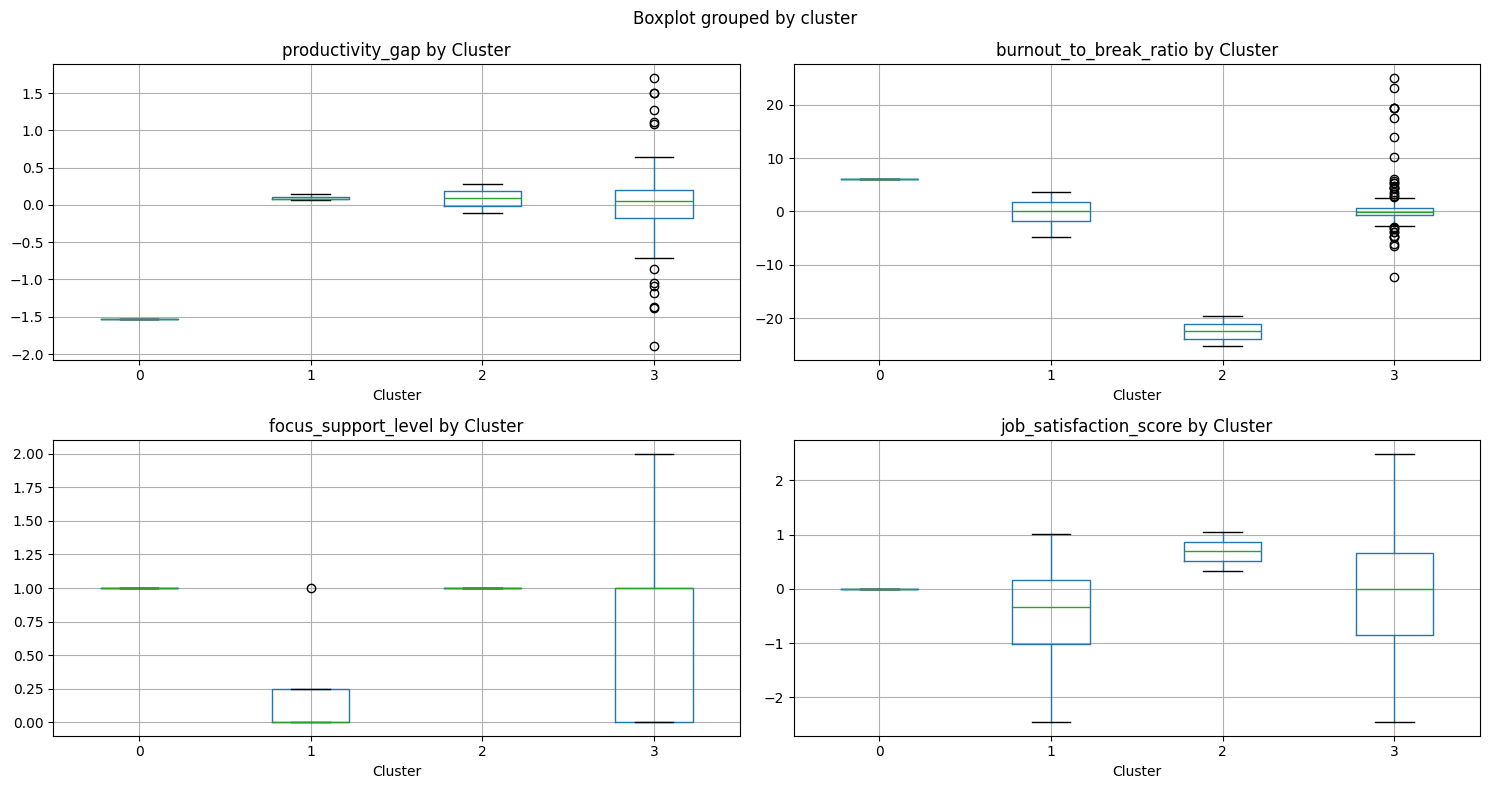


=== ANALISIS 5 CLUSTERS ===
Distribusi cluster:
Cluster 0: 1 samples (0.5%)
Cluster 1: 4 samples (2.0%)
Cluster 2: 2 samples (1.0%)
Cluster 3: 1 samples (0.5%)
Cluster 4: 192 samples (96.0%)

Karakteristik rata-rata setiap cluster:

Cluster 0:
  productivity_gap: -1.54
  screen_sleep_ratio: 1.83
  burnout_to_break_ratio: 6.12
  coffee_per_hour: 189.10
  offline_ratio: 0.00
  social_media_ratio: 218.75
  focus_support_level: 1.00
  age: 0.04
  job_satisfaction_score: -0.00

Cluster 1:
  productivity_gap: 0.10
  screen_sleep_ratio: -4183.02
  burnout_to_break_ratio: -0.23
  coffee_per_hour: -0.63
  offline_ratio: 0.00
  social_media_ratio: 0.34
  focus_support_level: 0.25
  age: -0.16
  job_satisfaction_score: -0.53

Cluster 2:
  productivity_gap: 0.09
  screen_sleep_ratio: 0.02
  burnout_to_break_ratio: -22.45
  coffee_per_hour: -1.72
  offline_ratio: 0.00
  social_media_ratio: -0.17
  focus_support_level: 1.00
  age: -0.25
  job_satisfaction_score: 0.69

Cluster 3:
  productivity_gap:

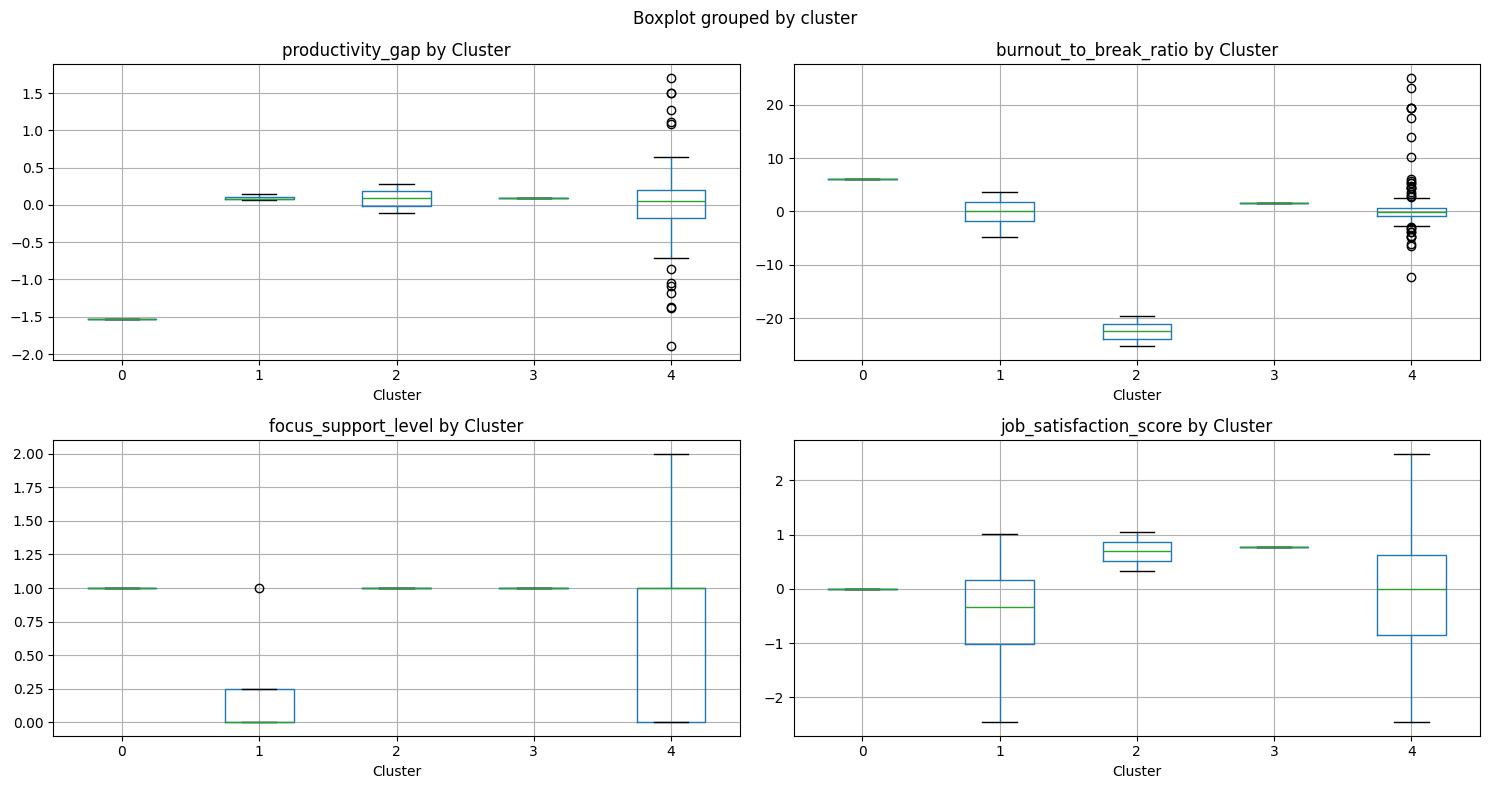

In [65]:
# 5. Analisis untuk berbagai jumlah cluster
for n_clusters in [3, 4, 5]:
    labels = clustering.get_clusters(n_clusters)
    analyze_clusters(encoded_df, labels, n_clusters)

    # Plot comparison untuk beberapa features penting
    important_features = [
        "productivity_gap", "burnout_to_break_ratio",
    "focus_support_level", "job_satisfaction_score"
    ]
    plot_cluster_comparison(encoded_df, labels, important_features)

In [66]:
labels = clustering.get_clusters(n_clusters=3)
sil_score = manual_silhouette_score(scaled_data2, labels)
db_index = manual_davies_bouldin_index(scaled_data2, labels)

print(f"Manual Silhouette Score: {sil_score:.4f}")
print(f"Manual DB Index: {db_index:.4f}")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Manual Silhouette Score: 0.2904
Manual DB Index: 0.9354
